In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from numpy import*
import csv
import xlrd

rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit
from scipy import integrate
from scipy.optimize import fsolve

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [265]:
def eta(X,a,b,c,d,e,f,g,h,i): 
    Pi1,Pi2,Pi3,Pi4,Pi5,Pi6,Pi7,Pi8 = X
    return (a +b*Pi1 + c*Pi2 + d*Pi3+e*Pi4+f*Pi5+g*Pi6+h*Pi7 + 0*Pi8)

In [266]:
workbook = xlrd.open_workbook('Data_Jaime.xlsx')
worksheet = workbook.sheet_by_name('Input')

In [267]:
N1 = 25

phi = zeros(N1)
Qc = zeros(N1)
W_mag_CB = zeros(N1)
W_mag_HB = zeros(N1)

Q_reg_HB= zeros(N1)
Q_pas_CB = zeros(N1)
Q_at_CB = zeros(N1)
Q_cas = zeros(N1)
W_p = zeros(N1)
K = zeros(N1)


for i in range(N1):
    phi[i] = worksheet.cell(0, i).value
    Qc[i] = worksheet.cell(1, i).value
    W_mag_CB[i] = worksheet.cell(2, i).value
    W_mag_HB[i] = worksheet.cell(3, i).value
    Q_reg_HB[i] = worksheet.cell(4, i).value
    Q_pas_CB[i] = worksheet.cell(5, i).value
    Q_at_CB[i] = worksheet.cell(6, i).value
    Q_cas[i] = worksheet.cell(7, i).value
    W_p[i] = worksheet.cell(8, i).value
    K[i] = worksheet.cell(9, i).value

In [268]:
M = curve_fit(eta,(W_mag_CB,W_mag_HB,W_p,Q_reg_HB,Q_pas_CB,K,Q_cas,Q_at_CB), Qc)
M[0]

array([ 3.95200616e+00,  2.53248431e+00, -2.42746982e+00,  3.75540501e+00,
        3.06064926e-01,  2.22623337e-02, -2.27055844e+02,  1.78594504e+02,
        3.52135603e-02])

Text(0.5,0,'$\\phi$ [-]')

Text(0,0.5,'$\\eta$ [-]')

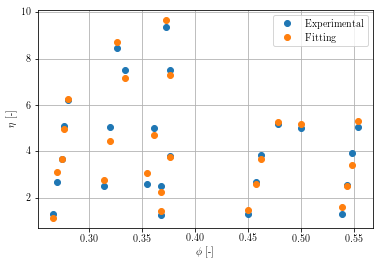

In [269]:
plt.plot(phi,Qc,'o',label = 'Experimental')
#plt.plot(phir,Qcr,'o',label = 'Numerical')
plt.plot(phi,eta((W_mag_CB,W_mag_HB,W_p,Q_reg_HB,Q_pas_CB,K,Q_cas,Q_at_CB),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4],M[0][5],M[0][6],M[0][7],M[0][8]),'o',label = 'Fitting')

plt.xlabel('$\phi$ [-]')
plt.ylabel('$\eta$ [-]')
plt.legend()
plt.grid()
#plt.savefig('Fitting _Restricted_8_Reduced.png',format = 'png', dpi=1000,bbox_inches='tight')

In [270]:
Erro_rel2 = (Qc-eta((W_mag_CB,W_mag_HB,W_p,Q_reg_HB,Q_pas_CB,K,Q_cas,Q_at_CB),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4],M[0][5],M[0][6],M[0][7],M[0][8]))

Text(0.5,0,'$\\phi$ [-]')

Text(0,0.5,'Error [$\\%$]')

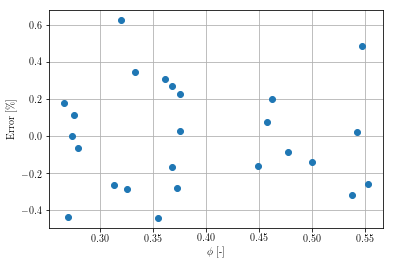

In [271]:
#plt.plot(phi,abs(Erro_rel),'o')
plt.plot(phi,(Erro_rel2),'o')
plt.xlabel('$\phi$ [-]')
plt.ylabel('Error [$\%$]')
plt.grid()

plt.savefig('Error_Restricted_8.png',format = 'png', dpi=1000,bbox_inches='tight')

In [138]:
max(abs(Erro_rel))

21.684531197869152